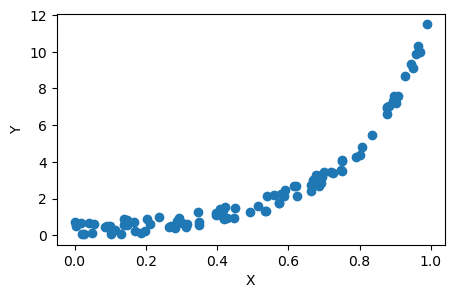

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 6.8*(X**7) + 1.8*(X**5) - \
    3.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.8*np.random.rand(100,1) # no data in world is perfect
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [26]:
from sklearn.metrics import r2_score as sk_r2_score

def r2_score(y, y_):
    return sk_r2_score(y, y_)

def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [27]:
from sklearn.linear_model import LinearRegression

R-square for Model Degree1: 0.7605204481614898
Adj. R-square for Model Degree1: 0.75558272544317


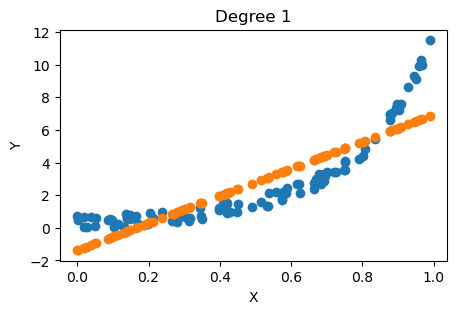

R-square for Model Degree2: 0.9617510709170765
Adj. R-square for Model Degree2: 0.9605557918832351


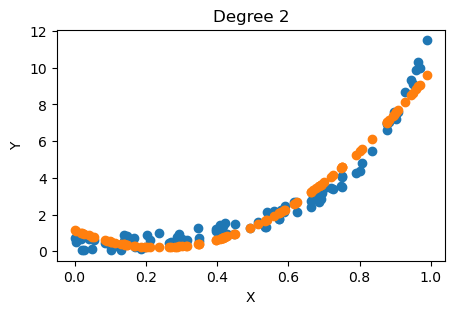

R-square for Model Degree3: 0.9871324662739464
Adj. R-square for Model Degree3: 0.9865906753802178


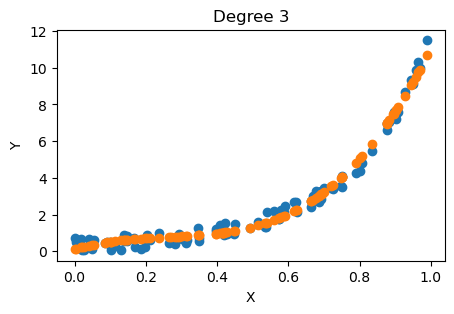

R-square for Model Degree4: 0.9915920355890302
Adj. R-square for Model Degree4: 0.9911448034395105


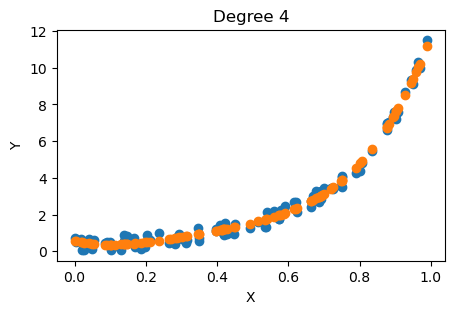

R-square for Model Degree5: 0.9920399699446809
Adj. R-square for Model Degree5: 0.9915264196185313


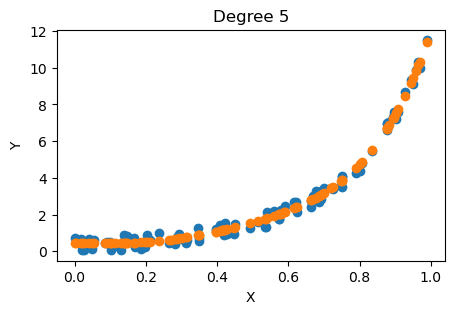

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'R-square for Model Degree{i}: {r2_score(y,output)}' )
    print(f'Adj. R-square for Model Degree{i}: {adj_r(r2_score(y,output),X_poly_scaled,y )}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()


# We can go on increasing the degree and keep on increasing r squared. But is it necessarily a good thing?

# How can we verify? We can use Adjusted R squared since this involves continuing to add variables?

# Even Adj r2 does not tell you how model performs on unseen data

# We can also use a testing set

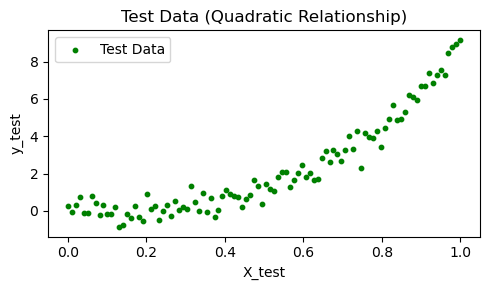

In [19]:
np.random.seed(42)
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Generate test outputs with degree 2 polynomial and small noise
# y = 4x^2 + 2x + noise
y_test = 3.5 * (X_test**2) + + 2.7*(X_test**3) + 0.5 * np.random.randn(100, 1) + 3.1 * X_test**6

# Visualize test data
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='green', s=10, label='Test Data')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Test Data (Quadratic Relationship)")
plt.legend()
plt.tight_layout()
plt.show()

Degree 1
  Train R²:     0.7605 | Adj R²: 0.7556
  Test  R²:     0.7680 | Adj R²: 0.7632


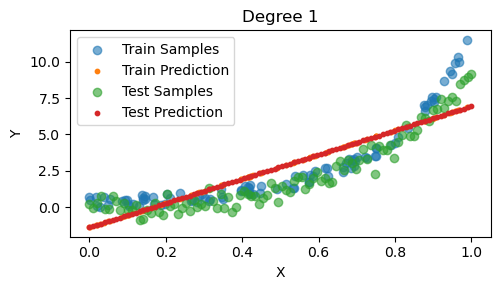

Degree 2
  Train R²:     0.9618 | Adj R²: 0.9606
  Test  R²:     0.9146 | Adj R²: 0.9120


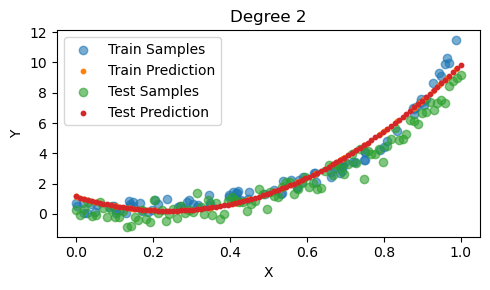

Degree 3
  Train R²:     0.9871 | Adj R²: 0.9866
  Test  R²:     0.8979 | Adj R²: 0.8936


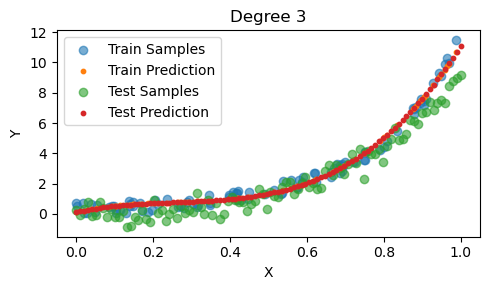

Degree 4
  Train R²:     0.9916 | Adj R²: 0.9911
  Test  R²:     0.8929 | Adj R²: 0.8872


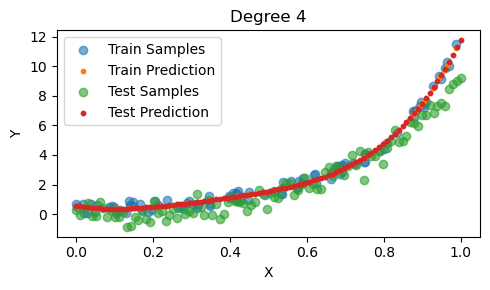

Degree 5
  Train R²:     0.9920 | Adj R²: 0.9915
  Test  R²:     0.8896 | Adj R²: 0.8825


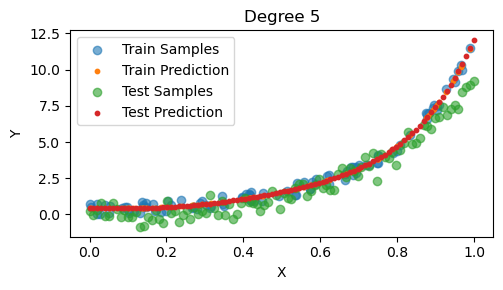

In [20]:
for i in range(1, 6):

    # Polynomial transform on training data
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    # Standardize training data
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    # Predict on training data
    y_train_pred = model.predict(X_poly_scaled)

    # Prepare and transform test data
    X_test_poly = poly.transform(X_test)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    y_test_pred = model.predict(X_test_poly_scaled)

    # Calculate R² and adjusted R²
    r2_train = r2_score(y, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_train = adj_r(r2_train, X_poly_scaled, y)
    adj_r2_test = adj_r(r2_test, X_test_poly_scaled, y_test)

    print(f"Degree {i}")
    print(f"  Train R²:     {r2_train:.4f} | Adj R²: {adj_r2_train:.4f}")
    print(f"  Test  R²:     {r2_test:.4f} | Adj R²: {adj_r2_test:.4f}")

    # Plotting both training and test predictions
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.scatter(X, y, label="Train Samples", alpha=0.6)
    ax.scatter(X, y_train_pred, label="Train Prediction", s=10)
    ax.scatter(X_test, y_test, label="Test Samples", alpha=0.6)
    ax.scatter(X_test, y_test_pred, label="Test Prediction", s=10)
    ax.set_title(f"Degree {i}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    plt.tight_layout()
    plt.show()

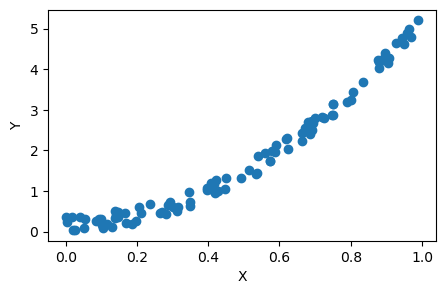

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

# Ovefitting and Underfitting

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

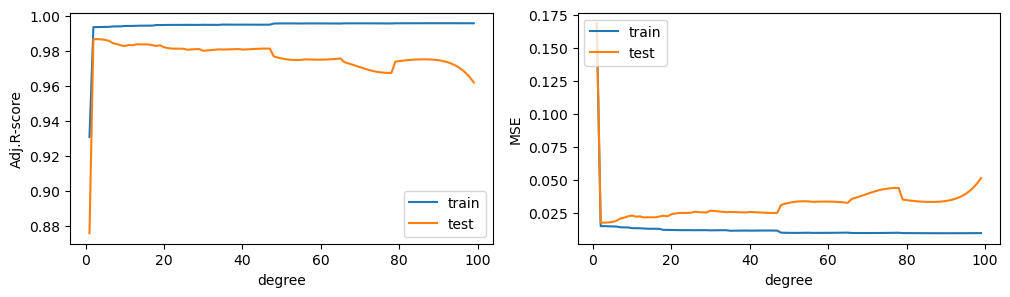

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()